# Часть I: Исследование одной характеристики

Гипотезы:
- H0: выборки из распределения Г
- H1: выборки из нормального распределения Exp

Методы:
- KNN-граф → характеристика: Число компонент связности
- Distance-граф → характеристика: Хроматическое число


In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from src.data_generation import generate_sample
from src.graph_utils import (
    build_knn_graph,
    build_distance_graph,
    num_connected_components,
    chromatic_number_interval_graph
)

In [2]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 0.9, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536]
dist = 5
n_samples = 50
n_iter = 2000



avg_num_connected_components = []
for alpha in alphas:
    num_conn_components = []
    for _ in range(n_iter):
        data = generate_sample("gamma", alpha=alpha, size=n_samples)
        G = build_knn_graph(data, dist)
        num_conn_components.append(num_connected_components(G))

    avg_num_connected_components.append(np.mean(num_conn_components))


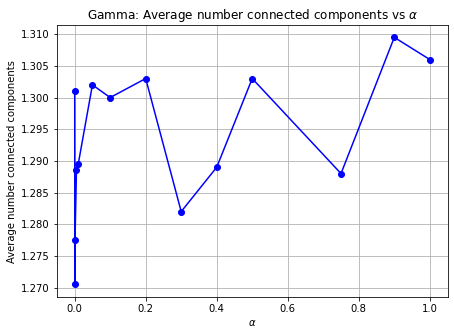

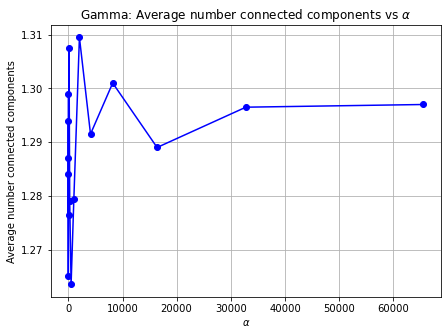

In [3]:
plt.figure(figsize=(7, 5))
plt.plot(alphas[:14], avg_num_connected_components[:14], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average number connected components")
plt.title("Gamma: Average number connected components vs $\\alpha$")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(alphas[14:], avg_num_connected_components[14:], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average number connected components")
plt.title("Gamma: Average number connected components vs $\\alpha$")
plt.grid(True)
plt.show()

In [4]:
avg_num_connected_components = []
for alpha in alphas:
    num_conn_components = []
    for _ in range(n_iter):
        data = generate_sample("exp", alpha=alpha, size=n_samples)
        G = build_knn_graph(data, dist)
        num_conn_components.append(num_connected_components(G))

    avg_num_connected_components.append(np.mean(num_conn_components))

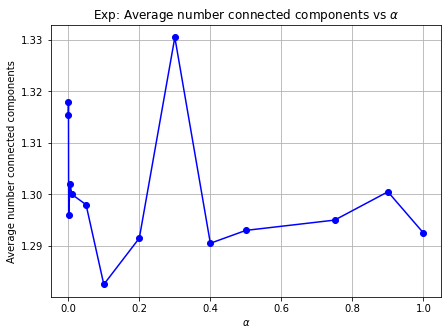

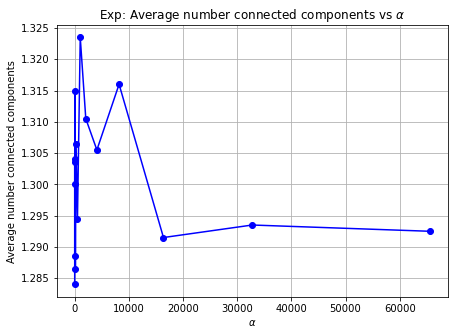

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(alphas[:14], avg_num_connected_components[:14], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average number connected components")
plt.title("Exp: Average number connected components vs $\\alpha$")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(alphas[14:], avg_num_connected_components[14:], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average number connected components")
plt.title("Exp: Average number connected components vs $\\alpha$")
plt.grid(True)
plt.show()


In [6]:
avg_chromatic_number = []
for alpha in alphas:
    chromatic_number = []
    for _ in range(n_iter):
        data = generate_sample("gamma", alpha=alpha, size=n_samples)
        num_conn_components.append(chromatic_number_interval_graph(data, dist))

    avg_chromatic_number.append(np.mean(num_conn_components))


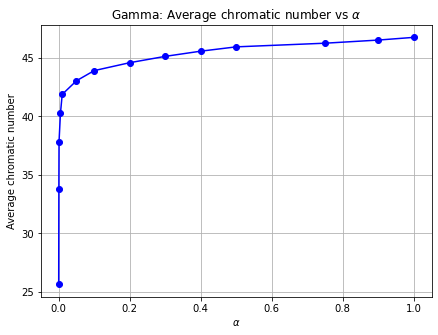

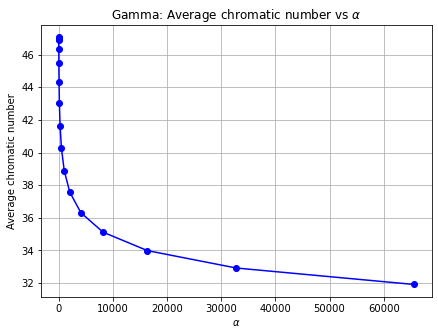

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(alphas[:14], avg_chromatic_number[:14], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average chromatic number")
plt.title("Gamma: Average chromatic number vs $\\alpha$")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(alphas[14:], avg_chromatic_number[14:], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average chromatic number")
plt.title("Gamma: Average chromatic number vs $\\alpha$")
plt.grid(True)
plt.show()


In [8]:
avg_chromatic_number = []
for alpha in alphas:
    chromatic_number = []
    for _ in range(n_iter):
        data = generate_sample("exp", alpha=alpha, size=n_samples)
        num_conn_components.append(chromatic_number_interval_graph(data, dist))

    avg_chromatic_number.append(np.mean(num_conn_components))

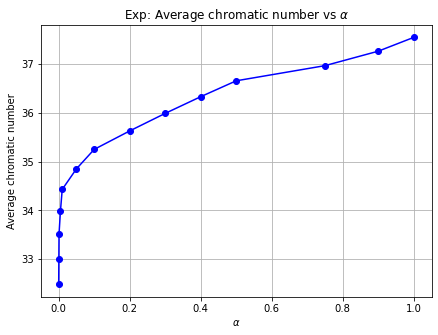

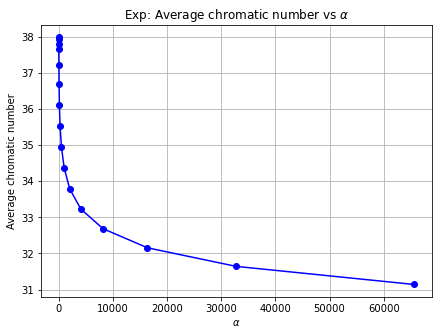

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(alphas[:14], avg_chromatic_number[:14], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average chromatic number")
plt.title("Exp: Average chromatic number vs $\\alpha$")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.plot(alphas[14:], avg_chromatic_number[14:], marker='o', color='blue')
plt.xlabel("$\\alpha$")
plt.ylabel("Average chromatic number")
plt.title("Exp: Average chromatic number vs $\\alpha$")
plt.grid(True)
plt.show()